<a href="https://colab.research.google.com/github/TianaGabel/C-2025/blob/main/DataWranglingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grant funding trends at CSU
**Author:** Tatiana Gabel

**Overview:** This project investigates new university grant funding at csu.

**Github Repo:** https://github.com/TianaGabel/Data_Wrangling_Machine_Learning

**Data files:** https://drive.google.com/drive/folders/1UePkAed9HHjU-MKjePPfJx0Q62pFZ1Uq?usp=sharing

### **Background:**
Universities receive a variety of external funding to support research, programs, employee costs, development projects among other initiatives. This support comes in the form of grants, cooperative agreements, contracts, etc. Which are collectively known as sponsored programs/projects. In order to receive funding Primary investigators(PIs) submit proposals to outside organizations such as federal agencies, corporations, non-profits or foundations. CSU is considered an Tier 1 research institution, which means that at least 50$ million in research expenditures. This designation attracts phd candidates and other researchers to CSU. Hence, the funding for sponsored projects is essential for CSU to stay competitive.

This project aims to explore sponsored project funding.

For this project, I will initially look at all awards. Then be narrowing my scope to Grants awarded by federal agencies in the 2nd and 2rd parts.
- Cooperative agreements and grants receive similar amounts of funding, but I have opted to focus on grants instead of cooperative agreements as in cooperative agreements federal employees worked directly with the project, rather than monitoring performance at specific deadlines.
- I chose federal agencies as historically they were the largest sponsors of academic research. However, as of 2025 the current poltical climate poses the threat of funding cuts and freezes which could significantly impact CSU.

Additionally, to further narrow the scope of data used only grants above 1,000 dollars between the years of 2016-2024 were used.

I will refer to grants with a start date within the specified year as "New" grants, even if the grant is for additional funding of a previous grant.

### **Datasets:**
**Office of sponsored projects University grant data**


Link: https://vprweb.research.colostate.edu/Proposal-Award-History-Search/Award.aspx

Description:
Contains the fields
- Principal investigator
- PI title
- Account Number
- Amount Obligated
- Start Date
- End Date
- Grant Title
- Transaction Type (Language has been altered each year. 2024 descriptions are much more concise and non-descriptive)
- College/Department
- Sponsor Agency

**CSU Faculty Credentials**

Link: https://app.powerbi.com/view?r=eyJrIjoiNTNiOTg2YzktNzg3MS00YjY4LTk1MDAtZmZjM2EzMjhjNGFiIiwidCI6ImFmYjU4ODAyLWZmN2EtNGJiMS1hYjIxLTM2N2ZmMmVjZmM4YiIsImMiOjZ9

Description:
Information on basic faculty credentials, most PIs are also faculty which allows the above dataset to be merged on the name field.
Contains the fields
- Name
- Department/Division
- Rank/Seniority (ex: associate professor)
- Tenured Status
- Highest Degree earned
 - Major
 - Year
 - University


# Import and Data Cleaning

In [82]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

warnings.filterwarnings("ignore")

#sponsored_programs_all_2024 = pd.read_excel("AllAwards2024.xlsx")
sponsored_programs_all = pd.read_excel("SponsoredProgramsData.xlsx")
federal_grants = pd.read_excel('FederalGrantData.xlsx')
faculty_credentials = pd.read_excel("Faculty-Credentials.xlsx")

# RQ 1: What does sponsored project funding look like at CSU?
Awards come from a variety of sources and in a variety forms. This section will give a general overview of all sponsored projects at CSU. This data ranges from 2013-April 2025, but some start and end dates extend past this range. Records were only included for an obligated amount over 1,000$

**1. Pivot table of sponsor types and award type.**

**2. Heat map based on the pivot table**

**3. Stacked Histogram of award duration.**

**4. Transaction, Start and End month frequency**

In [2]:
# Pivot table of amount obligated by award type and sponsor type
# Credit to https://stackoverflow.com/questions/68668046/styling-pandas-pivot-table-with-multiple-columns for table styling
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum', fill_value=0, margins=True,margins_name='Total_Awarded')
award_type_by_sponsor_type.style.format('${:,.0f}')

Award Type,Contract,Cooperative Agreement,GSA,Grant,IPA Agreement,OTA - Fed or FFT,Other,Total_Awarded
Sponsor Type,,,,,,,,
Colorado Higher Education - Private,"$115,000",$0,$0,"$3,600",$0,$0,$0,"$118,600"
Domestic Commercial,"$105,689,221","$5,496,449",$0,"$49,671,324",$0,$0,"$809,280","$161,666,274"
Domestic Foundations,"$17,639,177","$2,187,260",$0,"$98,620,857",$0,$0,"$123,024","$118,570,318"
Domestic Non-Profit (other than Domestic Foundations),"$54,596,070","$11,737,456","$30,000","$72,494,677",$0,$0,"$1,032,272","$139,890,475"
Federal,"$102,695,629","$1,552,158,718",$0,"$1,306,445,393","$18,961,647","$600,000","$30,578,391","$3,011,439,779"
Foreign Commercial,"$22,523,455",$0,$0,"$8,200,441",$0,$0,$0,"$30,723,896"
Foreign Foundations,"$47,107",$0,$0,"$6,634,807",$0,$0,"$141,724","$6,823,638"
Foreign Government,"$1,279,129",$0,$0,"$1,603,210",$0,$0,$0,"$2,882,339"
Foreign Higher Education,"$2,535,643","$4,101,938",$0,"$2,729,327",$0,$0,$0,"$9,366,909"


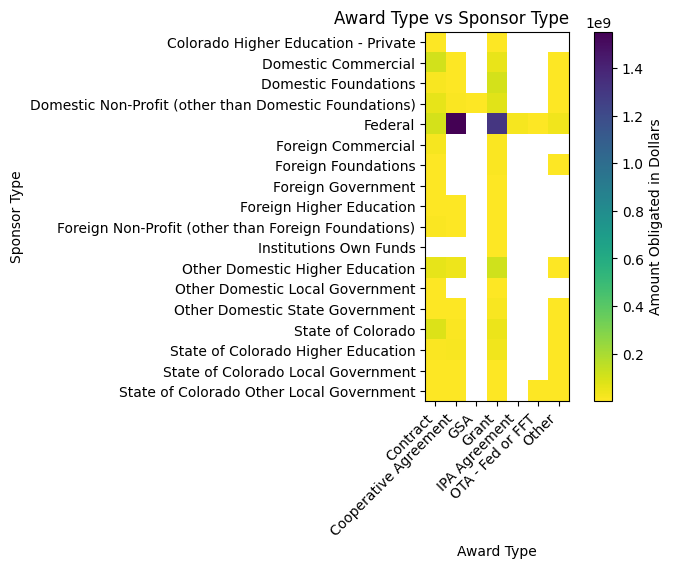

In [3]:
# Credit to "https://stackoverflow.com/questions/43943784/having-both-set-under-and-set-bad-working-in-matplotlib-contourf-plot" for how to update colormap

# New Table for graphing
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum')

colMap = cm.viridis_r
colMap.set_bad(color='white')

plt.imshow(award_type_by_sponsor_type, cmap=colMap)
plt.title("Award Type vs Sponsor Type",loc='right')
plt.ylabel("Sponsor Type")
plt.xlabel("Award Type")
plt.colorbar(label='Amount Obligated in Dollars')
plt.margins(0.1)

# award type labels
plt.xticks(ticks=range(len(award_type_by_sponsor_type.columns)), labels=award_type_by_sponsor_type.columns, rotation=45, ha='right')
#sponsor types
plt.yticks(ticks=range(len(award_type_by_sponsor_type.index)), labels=award_type_by_sponsor_type.index)

plt.show()

- From the Pivot table and the visualization it is clear that Federal funding makes up the majority of funding. Domestic funding including Commercial, Foundations, Non-profits, other educational institutions and the State of Colorado appear to award a larger amount total money than other sponsors, but still significantly less than federal funding.

- Grants, Cooperative Agreements and Contracts make up the majority of awarded awarded.

- Only one Gsa award has been awarded, towards "empower the family Evaluation" by Marc Winokur but it is unclear what this award type might stand for.

- Ipas(Intergovernmental Personnel Act) are awarded semi-frequently and only by the federal government to fund "temporary assignment of personnel".

- 2 OTAs (Other Transaction Agreement) were awarded. One by the Federal government and one by Local government. An OTA appears to be a more flexible contract for when a commerical interest will play a significant role in the project.

- Finally, only one grant was funded by CSU's own funds. It appears to be redistributing funds from a specific grant.

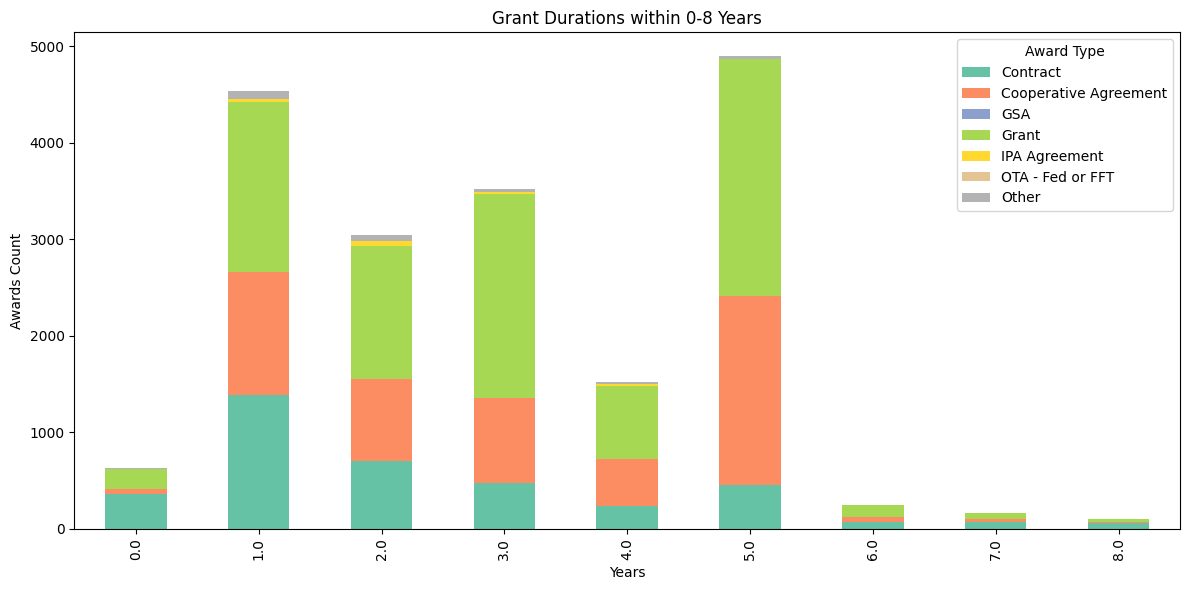

In [4]:
# get discrete year values (Rounding should function the same way binning does)
sponsored_programs_all['Grant Duration'] = round(((sponsored_programs_all['End Date'] - sponsored_programs_all['Start Date']).dt.days / 365).clip(lower=0))

# There are some grant outliers that last nearly 25 years, but a strong majority are within 8 years
sponsored_programs_all_2024_filtered = sponsored_programs_all[sponsored_programs_all['Grant Duration'] <= 8]

duration = sponsored_programs_all_2024_filtered.groupby(['Grant Duration','Award Type']).size().unstack(fill_value=0)
#print(duration)
duration.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))

plt.title('Grant Durations within 0-8 Years')
plt.xlabel('Years')
plt.ylabel('Awards Count')
plt.tight_layout()
plt.legend(title='Award Type', loc='upper right')
plt.show()

Awards at CSU tend to have durations less than 6 years. With peaks for grants lasting 1 year and lasting 5 years.

It appears that a large quantity of contracts last a shorter amount of time when compared to grants and cooperative agreements.

IPA funding appears to rarely be awarded for periods shorter than 6 months. With the highest frequency being awarded for durations between 18 months and 2.5 years.

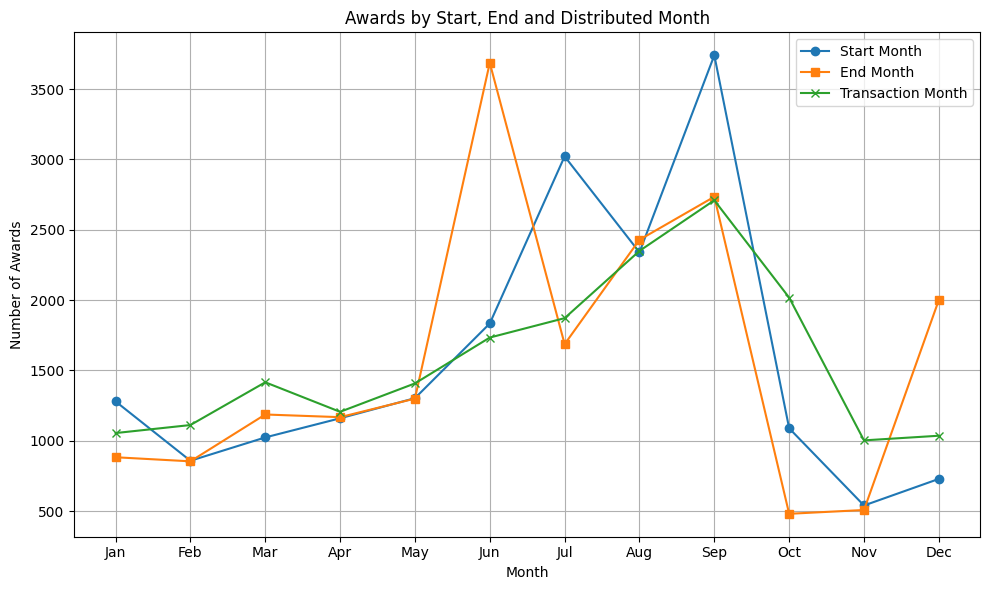

In [5]:
# Grants by Start and End Date
sponsored_programs_all['End Month'] = sponsored_programs_all['End Date'].dt.month
sponsored_programs_all['Start Month'] = sponsored_programs_all['Start Date'].dt.month
sponsored_programs_all['Transaction Month'] = sponsored_programs_all['Transaction Date'].dt.month

start_counts = sponsored_programs_all['Start Month'].value_counts().sort_index()
end_counts = sponsored_programs_all['End Month'].value_counts().sort_index()
t_counts = sponsored_programs_all['Transaction Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(start_counts.index, start_counts.values, marker='o', label='Start Month')
plt.plot(end_counts.index, end_counts.values, marker='s', label='End Month')
plt.plot(t_counts.index, t_counts.values, marker='x', label='Transaction Month')

plt.xlabel('Month')
plt.ylabel('Number of Awards')
plt.title('Awards by Start, End and Distributed Month')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Start Date:
  A large portion of awards start during the Summer months (June, July, August and September). I assume the peak in September coincides with the start of the fall Semester. However a similar peak is not seen in January. An alternative theory is that since the fiscal year ends in June, which means sponsors may have newly available funds during the summer months.
- End Date:
  End dates appear to be spread out with 3 notable peaks,in June (The end of the fiscal year), in September (The same month with the most awards starting) and in Decemeber (The end of the calendar year).
- Transaction Date:
  Transactions are distributed more evenly across the year. Transaction dates occur after an award start date in nearly all cases. The time between these 2 dates can be a few days to a year.

# RQ 2: How has Federal Grant funding changed over 2014-2024?
This section will focus specifically on federal grants and investigate outliers in federal funding at CSU. I want to explore what caused increases or decreases in funding outside of what is expected.

**1. Graph on distribution of funding by department**

**2. Stacked histogram of funding each year by Federal Agency**

**3. Investigation into outliers**

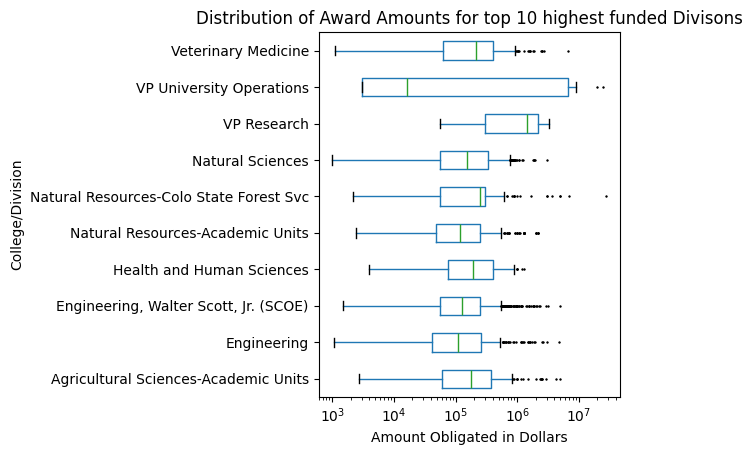

In [6]:
top_sponsors = federal_grants.groupby('College/Division')['Obligated Amount'].sum().sort_values(ascending=False)
top_ten = top_sponsors[:10]
#print(top_sponsors.index)

ax = federal_grants[federal_grants['College/Division'].isin(top_ten.index)].boxplot(column='Obligated Amount', by='College/Division', vert=False, flierprops=dict(marker='+', markersize=1) )
ax.set_xscale('log')
plt.title("Distribution of Award Amounts for top 10 highest funded Divisons")
plt.suptitle("")
plt.grid(False)
plt.xlabel("Amount Obligated in Dollars")
plt.tight_layout()
plt.show()

The mean obligated amount appears to be very similar between most of the top 10 divisions with the exception of the VP university Operations receiving less than average, and the VP research receiving larger grants on average.

I believe the VP university Operations data may contain fewer grant records than other division given the spread of the boxplot without a lower quartile.

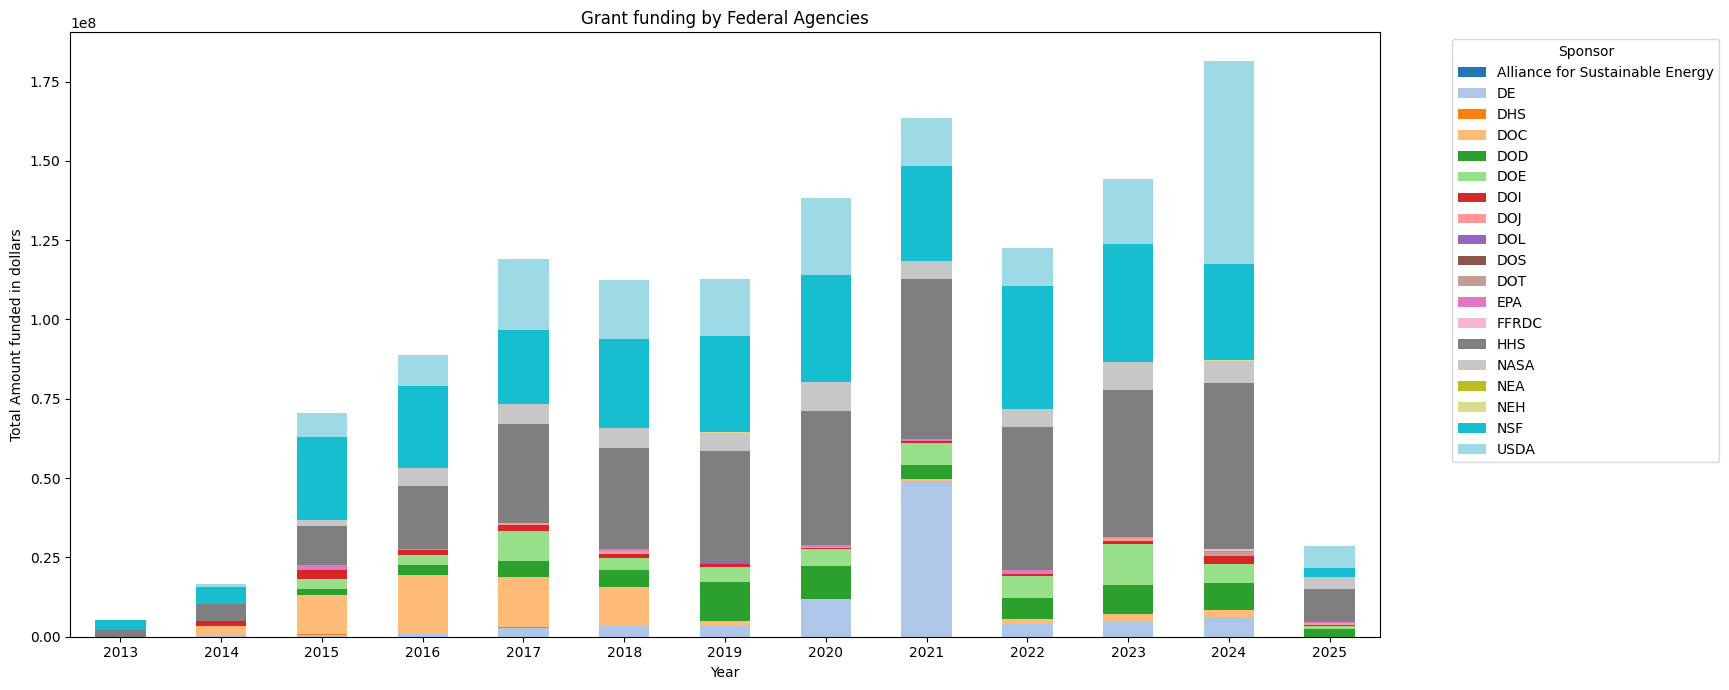

In [8]:
federal_grants = federal_grants[federal_grants['Sponsor Name'].str.contains('-', na=False)]
# Each sponsor contains an initial hyphenated portion of the encompassing agency with more relevant identifiers following
federal_grants['Sponsor Group'] = federal_grants['Sponsor Name'].str.split('-').str[0].str.strip()
federal_grants['Year'] = federal_grants['Transaction Date'].dt.to_period('Y').dt.to_timestamp()
sponsor_monthly = federal_grants.groupby(['Year', 'Sponsor Group'])['Obligated Amount'].sum().unstack(fill_value=0)

sponsor_monthly.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Grant funding by Federal Agencies')
plt.xlabel('Year')
plt.ylabel('Total Amount funded in dollars')
plt.xticks(range(len(sponsor_monthly.index)), range(2013,2026), rotation=0)
plt.tight_layout()
plt.legend(title='Sponsor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Funding has increased overtime, but stayed relatively consistent for each sponsoring federal agency.

I want to highlight 2 "outliers" I noticed within this graph.
1. The period from 2015 to 2018 where Department of Commerce funding is highest, but then tapers off completely.
2. Around 50 million was awarded by the Department of Education in 2021.
3. An additional 50 million was awarded by the USDA in 2024 compared to previously awarded amounts

In [10]:
#DOC outlier
doc_grants = federal_grants[(federal_grants['Sponsor Group'] == 'DOC') & (federal_grants['Year'] >= pd.to_datetime('2015', format='%Y')) & (federal_grants['Year'] <= pd.to_datetime('2018', format='%Y'))]
doc_grants.set_index('Principal Investigator', inplace=True)
top_ten = doc_grants.sort_values(by='Obligated Amount', ascending=False)[:10]
print(top_ten['Sponsor Name'].unique())
t = pd.pivot_table(top_ten,index='Principal Investigator',columns='Title', values='Obligated Amount', aggfunc='sum', fill_value=0)
t.style.format('${:,.0f}')

['DOC-NOAA-Natl Oceanic and Atmospheric Admn']


Title,"CIRA Research Collaborations with the NWS Meteorological Development Lab on Virtual Laboratory, and AWIPS II ...",Environmental Applications Research,NESDIS Environmental Applications Team
Principal Investigator,,,
"Miller,Steven D",$0,$0,"$3,184,869"
"Schranz,Sherri M","$1,583,155","$8,917,660",$0
"Strong,Bonny Lynn","$1,662,289","$7,132,511",$0


In [13]:
#DE outlier
de_grants = federal_grants[(federal_grants['Sponsor Group'] == 'DE') & (federal_grants['Year'] == pd.to_datetime('2021', format='%Y'))]
de = de_grants.sort_values(by='Obligated Amount', ascending=False)[:2]
t = pd.pivot_table(de,index='Principal Investigator',columns='Title', values='Obligated Amount', aggfunc='sum', fill_value=0)
t.style.format('${:,.0f}')

Title,HEERF II -- Colorado State University CARES Act Section 18004(a)(1) - Institutional Allocation,HEERF III (ARP) -- Colorado State University CARES Act Section 18004(a)(1) - Institutional Allocation
Principal Investigator,,
"Johnson,Laura Lynn","$19,449,668","$24,917,145"


In [20]:
#USDA outlier
usda_grants = federal_grants[(federal_grants['Sponsor Group'] == 'USDA') & (federal_grants['Year'] == pd.to_datetime('2024', format='%Y'))]
usda = usda_grants.sort_values(by='Obligated Amount', ascending=False)[:5]
t = usda[['Title','Obligated Amount']]
print(t)

                                                  Title  Obligated Amount
4865  2024 Community Wildfire Defense Grant (Underse...       27921456.00
4858  State Tree Nursery Infrastructure Disaster Ass...        5000000.00
4856  2023 Inflation Reduction Act Urban and Communi...        4875000.00
4829       FY2024 Colorado Forest Restoration Institute        2200000.00
4805  2024 CPG - Cooperative Fire Protection, State ...        1705579.31


1. The increase in funding from the department of Commerce was all focused in very similar areas and all grants from the Noaa. Additionally, In 2020 and 2021 just 5 total Noaa grants were issued, but there were hundreds of cooperative agreements. Hence, these records would not appear on a graph specific to grants. I also think that cooperative agreements have been chosen given how closely CSU researchers work with CIRA and noaa employees.
2. The increase in funding from the Department of Education was actually directly related to covid-19. The top 2 awards cover most if not all of the unaccounted data. The award was "HEERF II -- Colorado State University CARES Act Section 18004(a)(1) - Institutional Allocation". Heerf (Higher Education Emergency Relief Fund) was awarded for costs associated with coronavirus.
3. The increase in funding from the USDA is coming from the Forest research branch. More specifically, several large grants were awarded for Fire Prevention and restoration projects

# RQ 3: What does the typical Grant "Workload" look like?

**1. Comparison of Unique PIs, Unique Awards, and Grants**


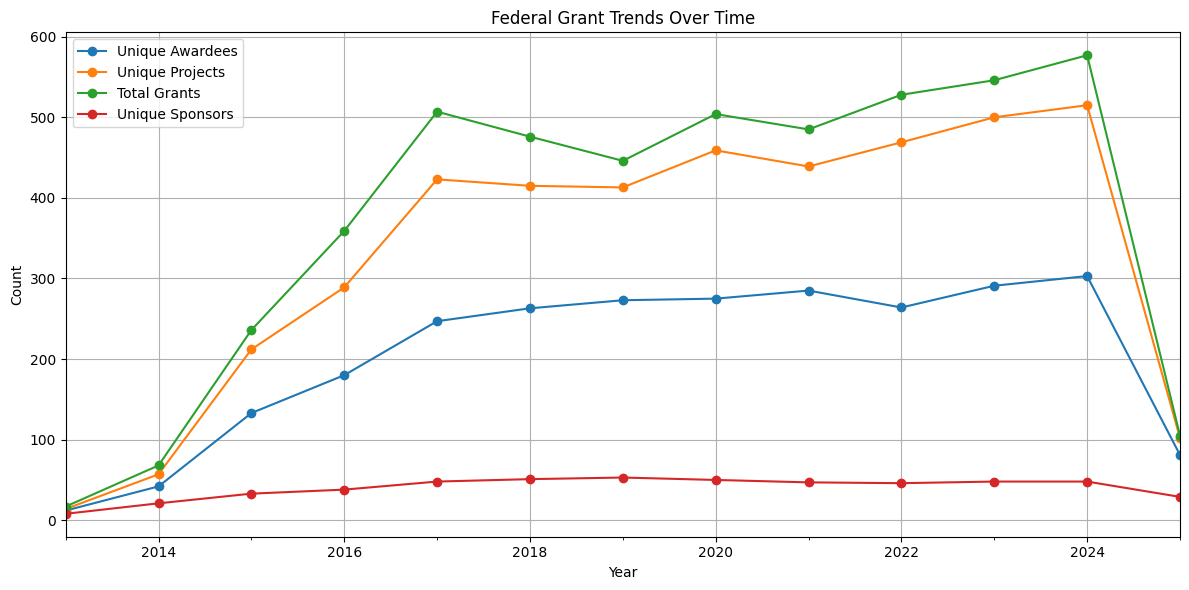

In [21]:
# Group by Year
monthly_stats = federal_grants.groupby('Year').agg({ 'Principal Investigator': 'nunique','Account Number': 'nunique', 'Title': 'count', 'Sponsor Name': 'nunique'})
monthly_stats = monthly_stats.rename(columns={'Principal Investigator': 'Unique Awardees','Account Number': 'Unique Projects','Title': 'Total Grants', 'Sponsor Name': 'Unique Sponsors'})

plt.figure(figsize=(12, 6))
monthly_stats.plot(ax=plt.gca(), marker='o')
plt.title('Federal Grant Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

There is an interesting correlation between the number of unique awardees, unique projects and total number of grants. This suggests that a portion of projects are awarded multiple grants within the same year. It also suggests that a substanial number of PIs are awarded mulitple grants.

PIs also do not appear to fluctate as much as the other metrics do suggesting CSU does a good job of maintaining PIs interest. Similarly, the variety of sponsors also does not fluctuate significantly.

In [76]:
pi_info['Title.1'].unique()

array(['Senior Management I', 'Professor', 'Associate Professor',
       'Affiliate', nan, 'Management I', 'Project/Prgm Mngmt III',
       'Prof/Indiv Contrib III', 'Resch Sci/Scholar II',
       'Senior Management II', 'Executive Leadership II',
       'SR Resch Sci/Scholar', 'Sr Research Associate',
       'Project/Prgm Mngmt I', 'Assistant Professor', 'Director',
       'Research Associate IV', 'Resch Sci/Scholar III',
       'Extension Mstr Instructor', 'Associate Director',
       'Guest Associate', 'Prof/Indiv Contrib II', 'Editor',
       'Project/Prgm Mngmt II', 'Project Manager I', 'Management II',
       'Extension Professor', 'Committee Member', 'Coordinator',
       'Forester', 'Research Associate III', 'Postdoctoral Fellow',
       'Instructor', 'Associate Dean', 'Resch Sci/Scholar I',
       'Management III', 'Program Management II', 'Vice President'],
      dtype=object)

In [83]:
#faculty names are not perfectly formatted
federal_grants['Principal Investigator'] = federal_grants['Principal Investigator'].str.replace(' ', '').str.lower()
faculty_credentials['Employee Name'] = faculty_credentials['Employee Name'].str.replace(' ', '').str.lower()

# need to determine Alumni status and broadcast it to all records
csu = ['csu', 'colorado state university', 'colorado state']
faculty_credentials['Is Alumni'] = faculty_credentials['Institution'].str.lower().isin(csu)
faculty_credentials = faculty_credentials.assign(is_alumni_any=lambda x: x.groupby('Employee Name')['Is Alumni'].transform('any'))

#and multiple degrees are listed for faculty members, the data is already order by degree rank
faculty_credentials = faculty_credentials.drop_duplicates(subset='Employee Name', keep='last')

pi_info = federal_grants.merge(faculty_credentials, how='left', left_on='Principal Investigator', right_on='Employee Name')
pi_info = pi_info.drop_duplicates(subset= 'Principal Investigator')


# Awardees that are not faculty or no longer faculty would not have a known rank
print("PI Faculty Titles")
pi_info['Rank'] = pi_info['Rank'].fillna("Other")
print(pi_info['Rank'].value_counts())

print("\nPI Tenure Status")
pi_info['Tenure Status'] = pi_info['Tenure Status'].fillna("Not Tenured or N/A")
print(pi_info['Tenure Status'].value_counts())

print("\nPI highest degree Earned")
print(pi_info['Degree Category'].value_counts(dropna=False))

print("\nPI Alumni status (Was CSU the most recent university from which a degree was awarded)")
print(pi_info['is_alumni_any'].value_counts())


PI Faculty Titles
Rank
Other                        303
Professor                    266
Associate Professor          143
Assistant Professor           66
Extension Mstr Instructor      4
Extension Professor            3
Instructor                     2
Name: count, dtype: int64

PI Tenure Status
Tenure Status
Tenured               388
Not Tenured or N/A    329
Eligible               70
Name: count, dtype: int64

PI highest degree Earned
Degree Category
Doctorate       453
NaN             307
Masters          13
Professional      8
Bachelors         6
Name: count, dtype: int64

PI Alumni status (Was CSU the most recent university from which a degree was awarded)
is_alumni_any
False    428
True      56
Name: count, dtype: int64


In [81]:
pi_info.column

Index(['Principal Investigator', 'Account Number', 'Obligated Amount',
       'Transaction Date', 'Start Date', 'End Date', 'Title',
       'Transaction Description', 'Award Type', 'Sponsor Type',
       'College/Division', 'Title.1', 'Sponsor Name', 'Fiscal Year',
       'Division Name', 'Department Name', 'Employee Name', 'Rank',
       'Tenure Status', 'Degree Category', 'Degree', 'Major', 'Year Earned',
       'Institution', 'Extract Date', 'Is Alumni', 'is_alumni_any'],
      dtype='object')

This data matches pretty closely to what I would have expected a PI might look like at CSU.

More than half are professors or Assistant professors, which aligns with around half of PIs being tenured. Similarly, it is not unexpected that around 450 PIs have a PhD given they are receiving grant funding.

It is important to note here that PIs who were never faculty and PIs who are no longer faculty do not have their information listed available. Among the "Other" category in title includes, Research Scientists, Coordinators, Management and other leadership roles. Including some who are CSU employees but not faculty. This also applies to the Nans in the highest degree awarded catergory.

Finally, I was suprised that Alumni make up a smaller portion of Faculty than I expected at around 13%

# Conclusions

In conclusion, the office of Sponsored programs has maintained a robust method to sustain an grow funding at CSU. Funding amounts, number of grants awarded, Principal investigators and even number of sponsors has remained stable for the past 8 years. While a decrease in federal funding would still have a signifcant impact given how much it makes up, researchers still have a variety of other funding options available.

Future research into this topic would benefit from further data cleaning, exploring the data by divison and applying other datasets such as the H-index, non-faculty profile data and other university metrics.